In [2]:
from numpy.random import random 

def generate(n):
    probs = random(n)
    probs /= sum(probs)
    return {chr(65+i) : probs[i] for i in range(n)}

In [3]:
import heapq
from collections import namedtuple

class Node(namedtuple("Node", ["left", "right"])):
    def walk(self, code, acc):
        self.left.walk(code, acc + "0")
        self.right.walk(code, acc + "1")
    
class Leaf(namedtuple("Leaf", ["char"])):
    def walk(self, code, acc):
        code[self.char] = acc or "0"
    
def huffman_encode(data):
    h = []
    for ch, prob in data.items():
        h.append((prob, len(h), Leaf(ch)))
    
    heapq.heapify(h)
    
    count = len(h)
    while len(h) > 1:
        prob1, _count1, left = heapq.heappop(h)
        prob2, _count2, right = heapq.heappop(h)
        heapq.heappush(h, (prob1+prob2, count, Node(left, right)))
    [(_prob, _count, root)] = h
    code = {}
    root.walk(code, "")
    return code

In [13]:
import time

N = [1000,2000,4000,8000, 16000]
result_time = []
for n in N:
    mean_time = 0
    for i in range(20):
        data = generate(n)
        startTime = time.time()
        code = huffman_encode(data)
        endTime = time.time()
        mean_time += (endTime - startTime)

    result_time.append(mean_time/20)
    print("Время работы:", mean_time/20, "seconds")

Время работы: 0.003846585750579834 seconds
Время работы: 0.00742720365524292 seconds
Время работы: 0.014671635627746583 seconds
Время работы: 0.03579893112182617 seconds
Время работы: 0.07045919895172119 seconds


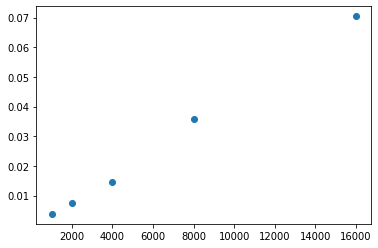

In [14]:
import matplotlib.pyplot as plt
plt.scatter(N,result_time)

In [5]:
%%time

n=100000
for i in range(10):
    data = generate(n)
    code = huffman_encode(data)

CPU times: user 8.11 s, sys: 24 ms, total: 8.13 s
Wall time: 8.13 s


In [7]:
%%time

samples = []
n=1000000
for i in range(10):
    samples.append(generate(n))

CPU times: user 5.3 s, sys: 424 ms, total: 5.72 s
Wall time: 5.72 s


In [8]:
%%time

n=1000000
for i in range(10):
    code = huffman_encode(samples[i])

CPU times: user 2min 2s, sys: 1.2 s, total: 2min 3s
Wall time: 2min 3s
